# Author: Husam Abdelrahim

## IS 362 : Finale Project

## An Intro to The Census Data: Poverty Rates and Understanding the Population Trends that is Occured in the United States

Today I am going to basically be looking at the two data that I will be working with and understand the relationship that is being presented and that is the relationship between the poverty rates and the population that is being distributed arcross the Untied States. By getting the information from the data of the census bureau API we are going to be uncovering the patterns that is being presented and we are solely going to focusing on (2015-2020) for better analysis and it spans from 5 years which gives us a much more richer insight, but also I am going to be analyzing the population that is being distributed across the region of the United States. The investigation that I am making here is going to be employing a data workflow, and once the that occurs from the data acquisition, transformation, and getting to understanding teh statistical analysis. I will also be providing information by presenting visualiation that utilizes both the tranditional and interactive methods of this working.

So the reason on wy the motivation behind the analysis is going to be needing to undersand the poverty affects and how it's being displayed in the United States and how the population is correlating with the ecomonic factors and indicatiors, so by combining these two information we can start to see a story that is happening and this could provide a very valuable insight not just for me but to policy makers and other government agencies that are concerned on fixing the problem with poverty

### The key objectives and the analysis that is going to be included:

- Going to be able to track information especially in regarding to the poverty rates that is being displayed in the United States from 2015 - 2020 
- Understading the population that is layed out across the United States and the regions 
- This is also going to be helping us with understanding the density and the appterns that is being dispalayed
- Having a visualizations that is interactive with the use of bokeh its going to help us better understand the relationship much more
- Understanding the analysis of the demographic patterns

## Summary of the process

This project that I am going to be presented is going to have a workflow that we can follow

**Data Acquisition**: In this step it's going to be basically utilize the census bureau and this is basically where I got my information especially with the API and being able to extract data of poverty and the population 

**Data Transformation**: In this steps I will manage to basically convert raw population that we have in our data to millions and create a population bracket that will be very applicable for the work that I will be presenting 

**The stats analytical**: We are going to be applying to the stat and being to understand with what the population has to provide

**Data visualizations**: We are going to creating a matplotlib visualization that is static but an interactive one with bokeh

## Importing the library

So in the beginning of the project what I usually like to do is put all of tools here and see with what I am going to work with, of course throughout the semester I continued to use pandas and matplotlib and one factor I didn't learn was bokeh, so with using these tools its going to help me with the acquistion of the data and being able to manipulate data and handle missing values and give us a better information on the work and help us with the aggregations, we are going to visualizate with line, bar and figures as well, the ability on using requests will help us interact with the web API and bokeh is another tool that I will be using and using the tool that comes with it to make it mroe enhanced and using these tools will help me complete the work and being able to present a rich work that is detailed and explain the findings that I am going to be presenting. 

# IMPORTANT NOTE:

Please be advised when running the code especially the API section it can take up to 2 minutes long to load (poverty) and the other API can take up a few seconds (Population)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bokeh.plotting import figure, output_file, show, save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column

## Step 1: Attaining the data and the process of the poverty data

In this phase what I will be doing is that I am going to be establish a connection the Census Bureau's API an this is going to help me getting the critical info that I am look for which is going to be from 2015-2020. So by doing this it's actually going to be the workflow and getting the proper information that I will be needing and in this step as well I am going to be structing the API requests to be able gather infroamtion of each of the year and the process of JSON it's going into the DataFrame and being about to show visualization when it comes down to understanding the trends and being able to analyze with what is being presented in the work. 

**Side Note:** It doesn't require an API key because the Census buerau gives you free access, but I have signed up for it and it's a good practice to continue to implement

### Key Notes:

- Basically connecting to the Census Bureau API and being able to get information on the poverty data and not just for one year but have access for mulitple years and which case in this scneario its going to be from 2015-202

- Being able to convert the the values of the string and make it into a numerical form and this is going to really help us with our analysis 

- The next step is that I am going to be creating a line chart of the poverty trends and this is going to help me with understanding the appropriate foramming and being able to save it as a reference and also this tool is going to help us with my visualization especially for the presentation slide

- I have also implemented error handling and the reason for this is that I am going to ensure that the acquisition of the data that I am receviing and the system would be able to provide a feed back if there was an actual API failure 

### Getting to know the insights

So as we see here that teh poverty rates is shwoing a decline and this is going from **13.5%** in 2015 to **10.5%** in the year of 209 and basicalyl what this is saying here is that there could've been a much higher economic improvment and another key insight that one must consider is that there is a notable reversal and that is because in 2020 we had covid-19 which also played a huge role especially in the economic improvements and many people were also filing for to receive funds which did help people in these during these trying times. There was a much higher and steeper drop from the year of 2018 and the year of 2019 and with having the idea of this is that we start to see a long and short term trend that is occuring. 

# Reminder:

## Please be advised that it may take a few seconds up to 2 minutes for it to fully run the poverty section. Please be patient! 

Retrieve the information of the data from Census Poverty API - The First Data Source Loading...

The Poverty Trends that is Presented  (CPS ASEC Data):
   YEAR  PCTPOV
0  2015    13.5
0  2016    12.7
0  2017    12.3
1  2017    12.3
0  2018    11.8
0  2019    10.5
0  2020    11.5


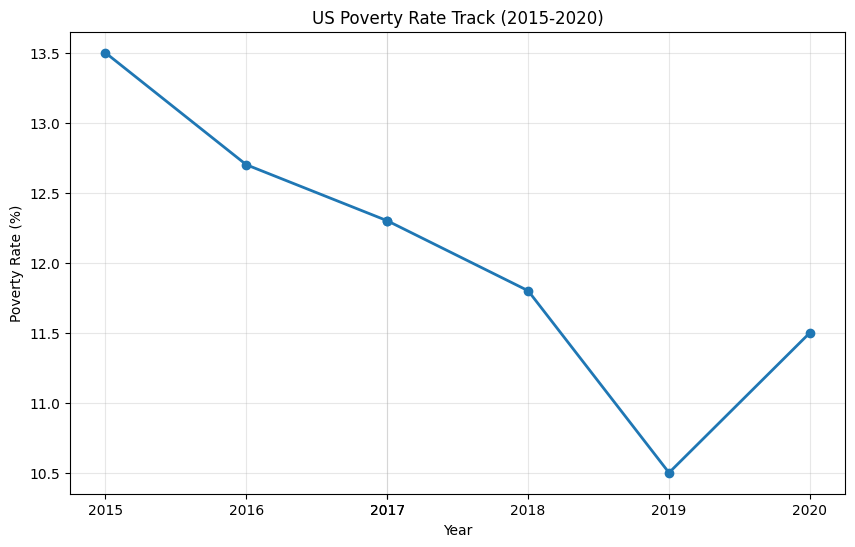

In [ ]:
# In this first step I am going to be basically getting the first source and we will be utilizing API

api_key = "YOUR_API_KEY_HERE"

print("Retrieve the information of the data from Census Poverty API - The First Data Source Loading...")

# Next step we are going to be define the years that we are going to be analyzing 

years = ["2015", "2016", "2017", "2018", "2019", "2020",]
all_poverty_data = []

# Now we are going to focus on getting the poverty rate for each of the year 

for year in years:
    year_url = f"https://api.census.gov/data/timeseries/poverty/histpov2?get=PCTPOV&time={year}&RACE=1&for=us:*"
    year_response = requests.get(year_url)
    
    if year_response.status_code == 200:
        # In this step with what is going to be done is that we are going to be getting the column names 
        if year == years[0]:
            columns = year_response.json()[0]
            
        # Now here is where we are going to be getting the data 
        year_data = pd.DataFrame(year_response.json()[1:], columns=columns)
        year_data['YEAR'] = year
        all_poverty_data.append(year_data)
    else:
        print(f"Failed to retrieve data for {year}: {year_response.status_code}")

# Next step I am going to be coming all of teh year like saying the data was retrieived overtime

# Combine all years if data was retrieved
if all_poverty_data:
    poverty_trends = pd.concat(all_poverty_data)
    poverty_trends['PCTPOV'] = pd.to_numeric(poverty_trends['PCTPOV'])
    poverty_trends['YEAR'] = pd.to_numeric(poverty_trends['YEAR'])
    
    print("\nThe Poverty Trends that is Presented  (CPS ASEC Data):")
    print(poverty_trends[['YEAR', 'PCTPOV']])
    
    # In this we are going to see and undersant the trends when it comes down to the poverty 
    plt.figure(figsize=(10, 6))
    plt.plot(poverty_trends['YEAR'], poverty_trends['PCTPOV'], marker='o', linestyle='-', linewidth=2)
    plt.title('US Poverty Rate Track (2015-2020)')
    plt.xlabel('Year')
    plt.ylabel('Poverty Rate (%)')
    plt.grid(True, alpha=0.3)
    plt.xticks(poverty_trends['YEAR'])
    plt.savefig('poverty_trends.png')
    plt.show()
else:
    print("Failed to retrieve poverty trend data")

## Step 2: The population Data and the Process of the data

Just like the first step, with what is going to occur in this step is that the main focal point is about attaining information and being able to process population that is in the U.S. States and this is going to help us to give us a better idea especially when it comes down to the economic distribution. I have managed to retrieve the data from the same source which was the **Census** and the source was about **population API** and I transformed this into a format that would help me for analytical purpose. Once again what we have done is get the API and it goes through the JSON response and making it into a more structured DataFrame, we are going to be creating a visualizations that mainly focused on the population especially and get in return 10 states that have the most population. This step is going to give us a context and understand the population estimates.

**Key Components**:

There are mutliple key components that should be pointed out like for example -

- I have managed to retrive the population data from teh Census API and we made sure the teh JSOn response was more structured for a DataFrame that would have proper data types which is really good 

- For cleaning purposes and clarity what I have deiced to do here is renamed the columns for clarity and I made sure that I decided to sort the states by population and this is going to be very critical as it will help me in the long run by indetifying a pattern

- The bar chart that I have managed to retrieve is basically going to show the top 10 of the states and having it with a more proper strucutre and the scale adjustments

- I am going to be saving the visualizations again, this might be helpful later on for the idea of analysis and the reporting on it

**Insights Gained**

So there is a couple of insights that I have managed to get from this and that is basically shows that **California** is one of the states that would usually have one of the most population with a number of **40 million residents** which is an absurd amount and this is followed by other states being like Texas and Florida. To the top 3 states are: **California, Texas, Florida** and we see that the highest population but as soon as we get to lower popular we see a massive drop and having this visualization is very help ful as it going to help us with understanding the population a lot more.

# Reminder:

## Please be advised that it may take a few seconds to load so please be patient!

Retrieve the information of the data from Census Poverty API - The Second Data Source Loading...

Census Population Estimates from the API Data - State Populations:
             State  Population
4       California    39512223
43           Texas    28995881
9          Florida    21477737
32        New York    19453561
38    Pennsylvania    12801989
13        Illinois    12671821
35            Ohio    11689100
10         Georgia    10617423
33  North Carolina    10488084
22        Michigan     9986857


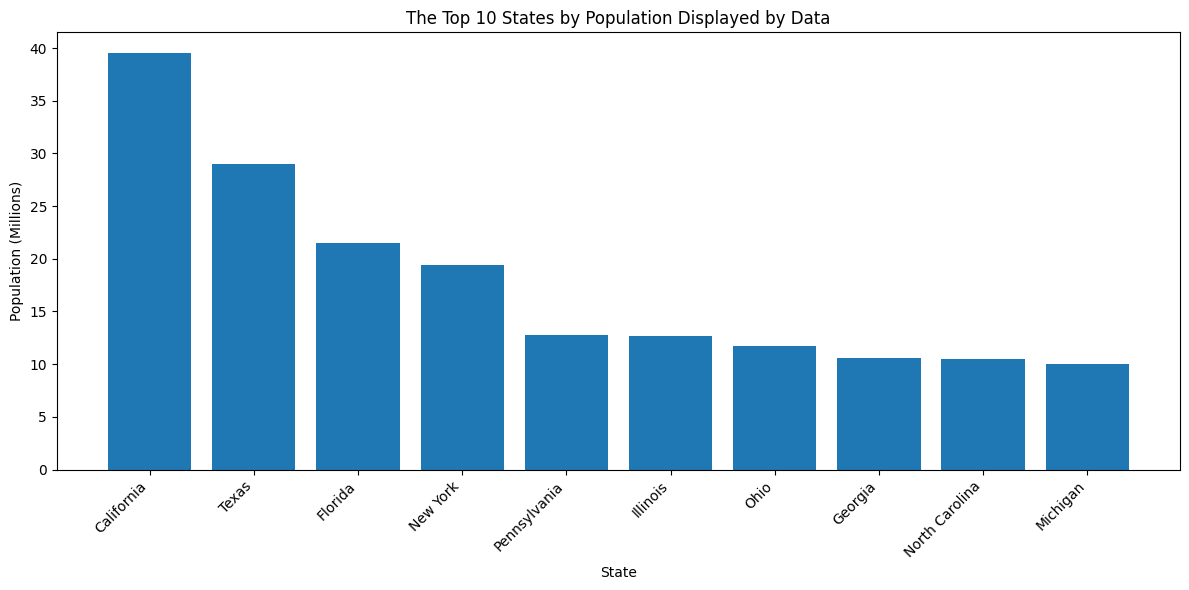

In [3]:
# Now in the second step with what is going to happen is that we are gonna do the same for the first aspect but this time getting the population this is basically gonna give us a better idea. 

print("Retrieve the information of the data from Census Poverty API - The Second Data Source Loading...")

# Now we are going to using another API as requested from the requirement and that is to basically get teh population estimation 

pop_url = "https://api.census.gov/data/2019/pep/population?get=NAME,POP&for=state:*"

pop_response = requests.get(pop_url)

if pop_response.status_code == 200:
    # In this process with what is going to be done is that I am going to basically process the population of the data 
    pop_data = pd.DataFrame(pop_response.json()[1:], columns=pop_response.json()[0])
    
    # I am going to to be ranming the columns to be more clearer 
    pop_data = pop_data.rename(columns={
        "NAME": "State",
        "POP": "Population"
    })
    
    # In this step with what is going to happpen is tha I am going to be coverting the population that we have here and with that population I am going to be turning it into numeric 
    pop_data['Population'] = pd.to_numeric(pop_data['Population'])
    
    # Over here what is going to be done is that the states is going to be sorted by hte population
    pop_data = pop_data.sort_values('Population', ascending=False)
    
    print("\nCensus Population Estimates from the API Data - State Populations:")
    print(pop_data[['State', 'Population']].head(10))
    
    # In this step of this section I am going to be creating and showing a visualiations and the state population and this is going to be coming with the top 10 sates 
    plt.figure(figsize=(12, 6))
    top_states = pop_data.head(10) 
    plt.bar(top_states['State'], top_states['Population'] / 1000000)
    plt.title('The Top 10 States by Population Displayed by Data')
    plt.xlabel('State')
    plt.ylabel('Population (Millions)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('state_population.png')
    plt.show()

## Step 3: Population Transformation and the Aggregation

In this step that we have here this is mroe of a data transformation that tends to be a more sophisticated and it's going to help us with enabling a more meangingful aggregation and also the classification as well especially when it comes down to the population data. In this step with what I am going to be doing is that categorize teh states by the population in brackets and this is going to help me out with the idea of analyzing and understanding the distrubtion, So transform the population data and making belong in a more meaningful group, so by the idea of using **pandas** cut function or pd.cut it's going to help me with being to assign states and being able to place it with the bracket and the population and then what is going to occur is that it's going to basically aggregate the count states to each of the category. By doing this sort of transformation it's going to give me a better idea and insight of course with the idea of knowing the pattern of the state populations.

**Highlights on this**:

So the key notes that I have managed to see from this work is that:

- Being able to actually define a meaningful population that I had in the brackers and being it applied with the pandasc cut fuction which help me categorize the states and that is being based on the population size itself. 

- Being able to perform an aggregation with the ability of using **groupby** it will enable for me to count state that is in the population bracket (each)

- With the creation of the visualization and saving it for later analysis this would give me a bette idea when it comes down to the opulation categories and being able to extract information

**What I gained from this**

So what I gained from this is that most of the states I want to ssay around the **22** mark would have 1-5 million and this would be able to show where majority of the state would fall on demographically level, and there is only three states that have managed to really exceed a population of over 20 million, and overall with what this graph is able to provide it actually provides  a framework to get a btter idea when it comes down to udnerstand the population and the that is in the United States of course. 


Now The Data Transformation & The Aggreation...

States Grouped by Population Bracket:
  Population_Bracket  State_Count
0           Under 1M            7
1              1M-5M           22
2             5M-10M           14
3            10M-20M            6
4           Over 20M            3


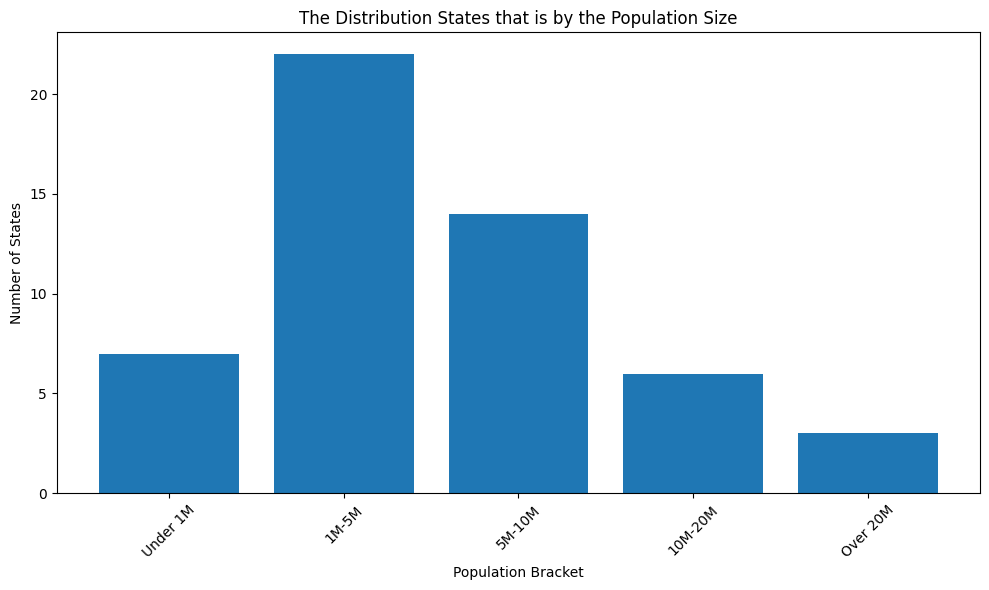

In [4]:
# In the third step with what is going to be done what I am going to be doing is data transformation and aggregationi in this step

print("\nNow The Data Transformation & The Aggreation...")

# in this part here what I am going to be doing here is that defining the population in the brackets and with this it's going to be a millions to match the scale that is being presented 

population_bins = [0, 1000000, 5000000, 10000000, 20000000, 50000000]
population_labels = ['Under 1M', '1M-5M', '5M-10M', '10M-20M', 'Over 20M']

# Now I am going to be creating a column that is going to be based on the population. 

pop_data['Population_Bracket'] = pd.cut(
        pop_data['Population'],
        bins=population_bins,
        labels=population_labels
    )

# In this step with what is going to be done is aggregating the sates by the population 

bracket_counts = pop_data.groupby('Population_Bracket', observed=True).size().reset_index(name='State_Count')
    
print("\nStates Grouped by Population Bracket:")
print(bracket_counts)
    
# VNow we are going to be visualizing the distribution that is being presented in my work.
plt.figure(figsize=(10, 6))
plt.bar(bracket_counts['Population_Bracket'], bracket_counts['State_Count'])
plt.title('The Distribution States that is by the Population Size')
plt.xlabel('Population Bracket')
plt.ylabel('Number of States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('population_distribution.png')
plt.show()

## Step 4: The Stats Analysis for the population data

In this step with what is going to cocur is that we are going to gaining a much deeper insight of what is going on with the opulation and getting to understand the distribution of the pattern that is shown in across states. By performing such regional analysis it will help me better to understanding the geographic patern that is being layed out across. So by calucating the descriptive stats for the state population after what is going to happen is that creating a system that would be able to analyze the geographic pattern and that would be with a classification system. By having the idea of assigning states and in this subject the regions that we are going to have is **Northeast, Midwest, South, Wwest** and by having these and being able to calcualte the avg of the populations by the region, we are going uncover details that will help us with enhancing our work and give us a better story.

**Key Inisghts:**

There are very good insights about this part and to list a few:

- The is a descriptiive statistics that able to be understood when it comes down to the variation of the state populations and the central tendency that is being presented in the work

- Another key note is that a geographic system has been made and with this it's actually going to be assinging the states to the proper regions that is being presented in the work.

- The avg caluclation with the population is going by region using a groupby operation and now there is going to be a visualization that display the regional differences between **Northeast, Midwest, South, Wwest**

- Lastly we see a region based analysis to have a better analysis and understanding of the pattern that is being displayed when it comes down to the population distribution 

**What we understand from this visualization**

What is being shown is that the **South region** seems to be one of the higest avg state 7.8 million population which is a lot but then with the **Midwest** we see that there is a lowest that is being displayed with a number of 5.7 million and of course we have to consider why is this and usually it comes down to opportunities that is being offered in those regions and then we have teh state population which we see 7.3 million avg  and we see that the median population sitting around 4.34 million is lower than the mean which comes in return with a number of 6.37 million and this is basically indicating a positively distribution that we see and from what I noticed is that this graph is possibly showing like a pattern that we are seeing iwth the urbanization trends


Statstical Analysis Initiated

The Summary of State Populations Stats:
count    5.200000e+01
mean     6.373716e+06
std      7.301997e+06
min      5.787590e+05
25%      1.790876e+06
50%      4.342705e+06
75%      7.362761e+06
max      3.951222e+07
Name: Population, dtype: float64

Avg Population by the that is presented Region:
      Region    Population
3      South  7.804669e+06
1  Northeast  6.220311e+06
4       West  6.026713e+06
0    Midwest  5.694084e+06
2      Other  1.949722e+06


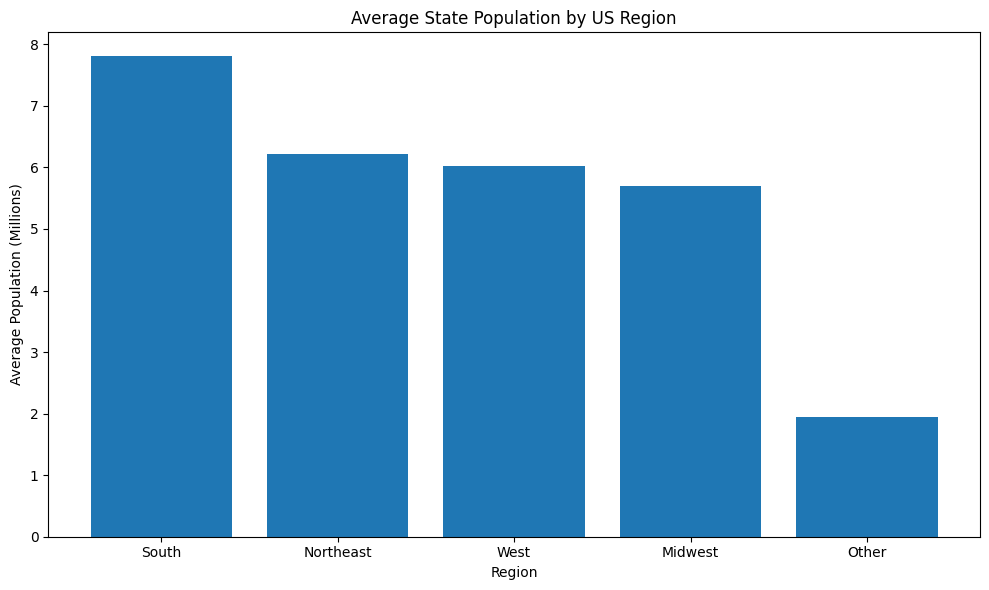

In [5]:
# Now in this step with what is going to happen is understanding the statistical analysis 

print ("\nStatstical Analysis Initiated")

# In this step we must calculate the descriptive stats and this is for hte population data that I am working with

pop_stats = pop_data['Population'].describe()

print("\nThe Summary of State Populations Stats:")
print(pop_stats)

# Now in this step I am going to be adding the classification for the regions and we are going to be comparing the regional population between northeast, midwest, south, and of course west

northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 
        'Vermont', 'New York', 'New Jersey', 'Pennsylvania']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 
        'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 
        'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
        'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 
        'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

# Now with the function that I am going to present is the if elif and else usage and this is going to assign with the region

    # Function to assign region
def assign_region(state):
    if state in northeast:
            return 'Northeast'
    elif state in midwest:
            return 'Midwest'
    elif state in south:
            return 'South'
    elif state in west:
            return 'West'
    else:
        return 'Other'
    

# Now we are going to be appying the region classification 

pop_data['Region'] = pop_data['State'].apply(assign_region)

# for this step I am going to be grouping the region and going to be calcualting the avg of the population that I am working with. 

region_population = pop_data.groupby('Region')['Population'].mean().reset_index()
region_population = region_population.sort_values('Population', ascending=False)

print("\nAvg Population by the that is presented Region:")
print(region_population)

# In this step I am going to be presenting the regional population of the visualization differences

plt.figure(figsize=(10, 6))
plt.bar(region_population['Region'], region_population['Population'] / 1000000)
plt.title('Average State Population by US Region')
plt.xlabel('Region')
plt.ylabel('Average Population (Millions)')
plt.tight_layout()
plt.savefig('regional_population.png')
plt.show()

# The output of the file that comes with the visualization 

output_file("interactive_visualizations.html")

## Step 5: The Interactive Visualization with the took "Bokeh"

This tool is called Bokeh and it's very nice tool to utilize iespecially when it comes down with the interactivity that it has and pretty simple and powerful tool to start utilizing. Now in this final step what is going to occur is that there is going to be two visualizations that will give us access for a much more deeper analytical view of the data, so the two charts that I have is interactive and they both dispaly poverty trends and the population. So by dveloping an interactive chart it gives us a better understanding that we can engage with especially when having interactive features like **tooltips** and **zoom** there is going to be a much more engaging way to understand the data patterns that is being discovered in the analysis.

**What is Being Presented:** Overall with what is being presented is that with the ideology of using bokeh with column data source and this is basically going to help us enable a more dynamic feature, and when I implemtend tooltips what it's going to do is that is going to show when a user is interacting with the points and it's going to display information which I do believe that overall it's acutally a nice touch to have and with the combination of the two visualizations making it into a much more cohesive work to actually interact with and explore. 

**Insights:** Overall these visualizations with what it's going to show is that a dashboard that is very engaging and very informative to interact with which is my goal, if I am going to be presenting a work that has interactivity with it I needed to add tooltips to enhance those work, with having a population bar chart and with the region it gives us a better idea to understand the demographic that is being presented and with the poverty trend showing a decline but all of the sudden there was a such increase and at the end of the day what I really love about interactive visualization is that it just gives the users more freedom to analyze the data much more closer which I reall do apperciate at the end of the day.

In [6]:
# Now in this step we are going to working with visualizations and that is bokeh visualization and first thing we doing is of course is the poverty that is trending over time

# in this step we are going to be creating a Colum data source

poverty_source = ColumnDataSource(data={
    'year': poverty_trends['YEAR'].astype(str),
    'poverty_rate': poverty_trends['PCTPOV'],
    'year_numeric': poverty_trends['YEAR']
})

# In this step we are goingto be creating a simple figure 

p1 = figure(
    title='United States Poverty Trends Rate: (2015-2020) - Interactive',
    x_axis_label='Year',
    y_axis_label='Poverty Rate (%)',
    height=400,
    width=700,
    tools="pan,box_zoom,reset,save,wheel_zoom"
)

# Now we add a line!

line = p1.line('year_numeric', 'poverty_rate', source=poverty_source, line_width=2, color='blue')

# In this step we are going to add circles for data points 

circles = p1.scatter('year_numeric', 'poverty_rate', source=poverty_source, size=8, color='blue', fill_alpha=0.4)

# This is the step where we add a hover tool 

hover1 = HoverTool(
    tooltips=[
        ('Year', '@year'),
        ('Poverty Rate', '@poverty_rate{0.1f}%')
    ],
    renderers=[circles]
)
p1.add_tools(hover1)

In [7]:
# In this next step we are going to visualize once more with bokeh

# I am going to be only using the top 10 states that is provided 

top_states = pop_data.head(10)

# Same as last time I am going to be basically creating a column data source

states_source = ColumnDataSource(data={
    'state': top_states['State'],
    'population': top_states['Population'],
    'population_millions': top_states['Population'] / 1000000,
    'region': top_states['Region']
})

# I am going to be creating a figure

p2 = figure(
    title='The Top 10 States by the Population! - Interactive',
    x_range=top_states['State'],
    y_axis_label='Population (Millions)',
    height=450,
    width=700,
    tools="pan,box_zoom,reset,save,wheel_zoom"
)

# I am also going to be adding the bars of the visualization

# Add bars
bars = p2.vbar(
    x='state',
    top='population_millions',
    width=0.7,
    source=states_source,
    color='green',
    alpha=0.7
)

# Having a hover tool which is basically gonna be good for my bokeh and pretty helpful

hover2 = HoverTool(
    tooltips=[
        ('State', '@state'),
        ('Population', '@population{0,0}'),
        ('Region', '@region')
    ],
    renderers=[bars]
)
p2.add_tools(hover2)

# In this step what I am going to do is rotate x-axis labels and what this will do for me is that it's going to a better choice for the idea of readability

p2.xaxis.major_label_orientation = 45


# Now I will be combining the visualizations and display 


combined_visualization = column(p1, p2)
show(combined_visualization)
file_path = save(combined_visualization, "interactive_visualizations.html")

## Conclusion

In this compreshensive work when we cover the **poverty rates** and the **population** distribution that is being displayed across the United States we start to see a very meaningful pattern and with this basically going ot enhance with the understanding that we have and the conditions that is coming from accross the country. 

The poverty rates is basically demostrating a  trend from 2015 to 2019 and we start to see a rate that is declining from **13.5%** to **10.5%** sugesting that there was some osrt of improvement during this perion but because of what happen in 2020, this is where things start to take a turn and increase again to a percentage of **11.5%**  that is being hihglighted in 2020 and the reason for this cause is because the disruption of Covid 19 and how it really impacted the pandemic and with the idea the pattern really shows the economic shock that can really shows a huge years in porgress when it comes down to trying to reduce the poverty reduction.

In our population analysis what we see is that a a few states such as **California, Texas, and Florida** really has a good amount of population which is more than I ever expected and and this could be because of the ecomomic choices, representation of the politics, resources, and when we have teh classification of the states in the bracket of the population it actually demostrates this a bit more and these are the three states that exceeds population stats but the other states falls short within the 1-5 million range.

We start to see a regional analaysis that is beign uncovered and it's displaying a very intutive geographic pattern like with the Southern states for example would have **7.8 million** population PER STATE and then we have Northeast comes right after with a **6.2 million** and the west should **6.0 million** and Midweest being the low with a number of **5.7 million** so we start to see a huge difference across the board and I do believe that there is a pattern that is being dislayed especially with the urbanization, understanding the opportunity like I have said earlier and the development of the state that is being displayed overtime.

The descriptive statistics that is being provided we start to see some sort of population distribution which is actualyl reavling an avg state population and this is somewhere around **6.37 million**, and this comes with the substanial variation. We start weo see a difference especially when it comes down to the mean and the mediatate state and we see **6.37 million vs 4.34 million**  that is basically going to be indcating a distribution with a few states that is populated that is going to be pulling the avg somewhat in a upward direction

### Considering both aspect

Now when we cosnider both of the poverty and population together we start to understand something that is much more deeper and a compelete image when it comes down to the socioeconomic presentation especially when it comes down to the conditions that is being presented across the United States, and while there might a distinction between the two we can see with how the population per-say can actually relate to an economic outcome.

So with the interactive visualization that I managed to creak with the use Bokeh actually shows a much deeper analytical view of the project making it easier to understand the exploration of this project and the user can understand the specific years of pthe provity trend and even examine states with the population, gaining a much better idea than having a static information

So with the project that I am presenting and getting multiple data from the census basically display an understanding of the socioeconomic conditions and that is with having a structred analytical workflow, with transformation and getting to understand the analysis and the visualization we start to see a much deeper insight that can be used for further research


## The apprach

There are some techniques and approach that I have managed to use

1. **API data:** This step I have managed to successfully get teh API to access a demographic and information review of the problem which really helped me put it together especially with how light and easy Census was

2. **Data Transformation:** Being able to covert the raw data into a much more meaningful categories and a better metric to display

3. **Statistical analyize:** When a descriptive patten is being applied  and uncovering the patterns that is now shown 

4. **The Visualization"** I created a static graph with matplotlib and interactive with bokeh that is very useful

5. **Classification of the regional:** In this step what I have decided to do is basically group to understand the pattern much better

6. **Interactive tools**: In this step I am going to be implementing a modern visualization where user can take a close look on the data and interact with it.


## Future implementations

For the future this could be used for socioeconomic factors and getting to understand educational attainment, employment rates, this could also be used to understand problem at least on a country level and getting to to understand the relationship with the population a lot more and poverty in rural and urban areas, and getting to explore the impact of what policy different can actually occur 

In conclusion, with this analysis that is being provided it's makes us understand the complexity with the population and the poverty that is being occured in the United states and give us a slight idea of why is this occuring, with such a rise in population many are also going into poverty due to know having the same opportunity and by using the Census data we really gained valuable insights on this topic and the pattern that is being presented across the Untied State. The technique that was used can really be served for future analyses especially with socioeconomic and getting a better idea with nice and proper visualization that users may interact with. 